In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

**BUKA DATASET .CSV YANG BELUM DI CLEAN**

In [197]:
dfDirty = pd.read_csv('TransJakarta Passengers 2021.csv')
dfDirty

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


**BUAT DATASET CLEAN**

In [198]:
#Membuat Dataframe Baru yang nantinya akan berisikan Dataframe yang sudah dibersihkan
dfClean = dfDirty.sort_values(['bulan', 'jenis', 'jumlah_penumpang'], ascending=[False, True, False])
dfClean

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
842,2021,12,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,176
834,2021,12,Angkutan Umum Integrasi,6H,Senen - Lebak Bulus,8
820,2021,12,Angkutan Umum Integrasi,9H,Cipedak - Blok M,0
821,2021,12,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,0
822,2021,12,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,0
...,...,...,...,...,...,...
507,2021,1,Mikrotrans,JAK.53,Grogol - Pos Pengumben via Slipi,20947
491,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280
551,2021,1,Mikrotrans,JAK.09,Roxy Mas - Karet,19924
545,2021,1,Mikrotrans,JAK.13,Tanah Abang - Kota Intan via Jembatan Lima,14490


In [199]:
#Melakukan pengecekan terhadap kolom yang masih Null

dfClean.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [200]:
#Mengisi Kolom Null

#Buat sebuah dictionary yang memetakan kode_trayek ke trayek
trayekDict = dfClean.dropna(subset=['trayek']).set_index('kode_trayek')['trayek'].to_dict()

#Isi nilai yang kosong dalam kolom 'trayek' dengan nilai dari trayek_dict berdasarkan 'kode_trayek'
dfClean['trayek'] = dfClean['trayek'].fillna(dfClean['kode_trayek'].map(trayekDict))

In [201]:
#Mengecek Kode Trayek dengan Trayek Double

#Hitung jumlah trayek unik untuk setiap kode trayek
kodeTrayekCounts = dfClean.groupby('kode_trayek')['trayek'].nunique()

#Cetak kode trayek yang memiliki lebih dari satu trayek
print(kodeTrayekCounts[kodeTrayekCounts > 1])

kode_trayek
1A        2
3E        2
4         2
JAK.01    2
JAK.41    2
Name: trayek, dtype: int64


In [202]:
#Daftar kode trayek yang diinginkan
trayekDouble = ['3E', '3E Baru']

#Buat DataFrame baru yang hanya berisi data dengan kode trayek diinginkan
dfTrayekDouble = dfClean[dfClean['kode_trayek'].isin(trayekDouble)]
dfTrayekDouble

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
841,2021,12,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,0
1451,2021,11,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,901
961,2021,9,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22173
226,2021,8,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,16416
472,2021,6,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23236
715,2021,5,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,22119
1328,2021,4,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,23523
350,2021,3,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,23513
1082,2021,2,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,17495
594,2021,1,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385


In [203]:
#Koreksi semua Kode Trayek yang memiliki unique Trayek Double
#Buat dictionary yang memetakan trayek lama ke trayek baru
koreksiTrayek = {
    'Kampung Melayu - Ppulo Gadung': 'Kampung Melayu - Pulo Gadung',
    'Ttanjung Priok - Plumpang': 'Tanjung Priok - Plumpang',
    'Pulo Ggadung 2 - Tosari': 'Pulo Gadung 2 - Tosari'
}
#Ganti trayek lama dengan trayek baru
dfClean['trayek'] = dfClean['trayek'].replace(koreksiTrayek)

# Bersihkan data dengan menghapus spasi tambahan
dfClean['kode_trayek'] = dfClean['kode_trayek'].str.strip()
dfClean['trayek'] = dfClean['trayek'].str.strip()

# Ganti kode_trayek '1A' menjadi '1A Baru' jika trayeknya 'PIK - Balai Kota'
dfClean.loc[(dfClean['kode_trayek'] == '1A') & (dfClean['trayek'] == 'PIK - Balai Kota'), 'kode_trayek'] = '1A Baru'
# Ganti kode_trayek '3E' menjadi '3E Baru' jika trayeknya 'Sentraland Cengkareng - Puri Kembangan'
dfClean.loc[(dfClean['kode_trayek'] == '3E') & (dfClean['trayek'] == 'Sentraland Cengkareng - Puri Kembangan'), 'kode_trayek'] = '3E Baru'


In [204]:
#Mengecek Trayek dengan Kode Trayek Double

#Hitung jumlah kode trayek unik untuk setiap trayek
trayekCounts = dfClean.groupby('kode_trayek')['trayek'].nunique()

#Cetak trayek yang memiliki lebih dari satu kode_trayek
print(trayekCounts[trayekCounts > 1])

Series([], Name: trayek, dtype: int64)


In [205]:
#Daftar trayek yang diinginkan
#ruteDouble = ['Cililitan - Condet via Kayu Manis', 'Tanjung Priok - Jembatan Item']

#Buat DataFrame baru yang hanya berisi data dengan trayek diinginkan
#dfRuteDouble = dfClean[dfClean['trayek'].isin(ruteDouble)]
#dfRuteDouble

In [206]:
#Memperbaiki semua data kolom 'trayek' yang memiliki lebih dari 1 unique 'kode_trayek'

#Ganti kode trayek 'JA.77' menjadi 'JAK.77'
dfClean['kode_trayek'] = dfClean['kode_trayek'].replace('JA.77', 'JAK.77', regex=True)
#Ganti kode trayek 'JAK,19' menjadi 'JAK.19'
dfClean['kode_trayek'] = dfClean['kode_trayek'].replace('JAK,19', 'JAK.19', regex=True)
#Ganti kode trayek 'JAK. 10B' menjadi 'JAK.10B'
dfClean['kode_trayek'] = dfClean['kode_trayek'].replace('JAK. 10B', 'JAK.10B', regex=True)
# Ganti trayek menjadi 'PGC 2 Cililitan - Condet' jika kode_trayeknya 'JAK.16' dan trayeknya 'Cililitan - Condet via Kayu Manis'
dfClean.loc[(dfClean['kode_trayek'] == 'JAK.16') & (dfClean['trayek'] == 'Cililitan - Condet via Kayu Manis'), 'trayek'] = 'PGC 2 Cililitan - Condet'

In [207]:
#Mengecek Kode Trayek dengan Jenis Kendaraan Double
#Hitung jumlah trayek unik untuk setiap kode trayek
JenisCounts = dfClean.groupby('kode_trayek')['jenis'].nunique()

#Cetak kode trayek yang memiliki lebih dari satu trayek
print(JenisCounts[JenisCounts > 1])

Series([], Name: jenis, dtype: int64)


In [208]:
#Cek Jumlah Penumpang = 0
# Tampilkan semua baris di mana jumlah_penumpang adalah 0
dfZero = dfClean.loc[dfClean['kode_trayek'] == 'JAK.10B']
dfZero

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085
1404,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008
1158,2021,7,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Jaya,3136
304,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828


In [209]:
# Hitung jumlah muncul kode trayek per bulan
dfTrayek = dfClean.groupby(['tahun', 'bulan', 'kode_trayek']).size().reset_index(name='jumlah')

# Tampilkan kode trayek yang muncul lebih dari 1 kali dalam sebulan
dfLebihSatu = dfTrayek[dfTrayek['jumlah'] > 1]
#dfLebihSatu

# Menggabungkan baris dengan kode trayek dan bulan yang sama
dfClean = dfClean.groupby(['tahun', 'bulan', 'jenis', 'kode_trayek', 'trayek'], as_index=False)['jumlah_penumpang'].sum()
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1472 non-null   int64 
 1   bulan             1472 non-null   int64 
 2   jenis             1472 non-null   object
 3   kode_trayek       1472 non-null   object
 4   trayek            1472 non-null   object
 5   jumlah_penumpang  1472 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.1+ KB


In [210]:
dfClean['trayek'] = dfClean['trayek'].replace('Ragunan - Stasin MRT Fatmawati', 'Ragunan - Stasiun MRT Fatmawati')


**RESET INDEX**

In [211]:
dfClean = dfClean.sort_values(['bulan', 'jenis', 'jumlah_penumpang'], ascending=[False, True, False])
#Reset index
dfClean = dfClean.reset_index(drop=True)

dfClean

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,12,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,176
1,2021,12,Angkutan Umum Integrasi,6H,Senen - Lebak Bulus,8
2,2021,12,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,0
3,2021,12,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0
4,2021,12,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,0
...,...,...,...,...,...,...
1467,2021,1,Mikrotrans,JAK.53,Grogol - Pos Pengumben via Slipi,20947
1468,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280
1469,2021,1,Mikrotrans,JAK.09,Roxy Mas - Karet,19924
1470,2021,1,Mikrotrans,JAK.13,Tanah Abang - Kota Intan via Jembatan Lima,14490


# Analisis

**Analisa Rata-rata Jumlah penumpang**

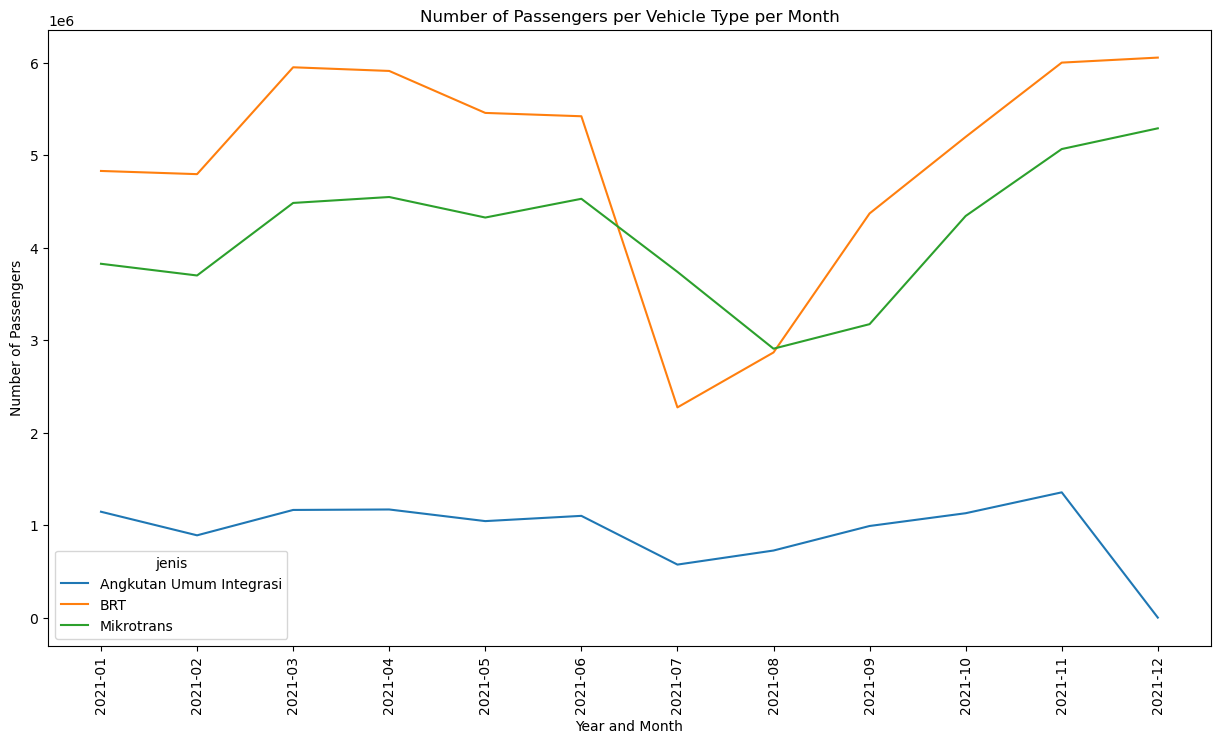

In [212]:
# Ensure that month and year are of type str so they can be properly sorted when plotting
dfClean['tahun'] = dfClean['tahun'].astype(str)
dfClean['bulan'] = dfClean['bulan'].astype(str)

# Create a new column combining year and month for proper sorting and better visualization
dfClean['tahun_bulan'] = dfClean['tahun'] + '-' + dfClean['bulan'].str.zfill(2)  # zfill(2) is used to ensure single digit months have a leading zero

# Group by 'year_month' and 'jenis' and calculate the sum of 'jumlah_penumpang'
dfCleanGrouped = dfClean.groupby(['tahun_bulan', 'jenis'])['jumlah_penumpang'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 8))  # Adjust the size of the plot as per your requirements
sns.lineplot(data=dfCleanGrouped, x='tahun_bulan', y='jumlah_penumpang', hue='jenis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
plt.title('Number of Passengers per Vehicle Type per Month')
plt.xlabel('Year and Month')
plt.ylabel('Number of Passengers')

plt.show()

***Grafik Peak Season***

dari grafik diatas terlihat bahwa naik terdapat kenaikan maupun penurunan dari tiap jenis kendaraan yang ada
1. pada jenis kendaraan *BRT* dapat dilihat bahwa penurunan paling tajam terjadi pada Juli 2021 dan setelah itu terdapat kenaikan yang cukup signifikan di bulan-bulan selanjutnya sampai dengan November 2021.
2. untuk jenis kendaraan *Mikrotrans*, terdapat penurunan yang cukup signifikan juga pada Juli 2021 hingga Agustus 2021. Lalu mulai terjadi peningkatan kembali di bulan-bulan selanjutnya sampai Desember 2021.
3. sedangkan pada jenis kendaraan *Angkutan Umum Integrasi*, jumlah penumpang relatif stabil di titik yang cukup rendah, namun pada Desember 2021 hanya terdapat dua rute yang mengangkut penumpang sedangkan untuk rute yang lain tidak mengangkut penumpang sama sekali.

In [213]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1472 non-null   object
 1   bulan             1472 non-null   object
 2   jenis             1472 non-null   object
 3   kode_trayek       1472 non-null   object
 4   trayek            1472 non-null   object
 5   jumlah_penumpang  1472 non-null   int64 
 6   tahun_bulan       1472 non-null   object
dtypes: int64(1), object(6)
memory usage: 80.6+ KB


**Analisa Perkembangan Jumlah Penumpang**

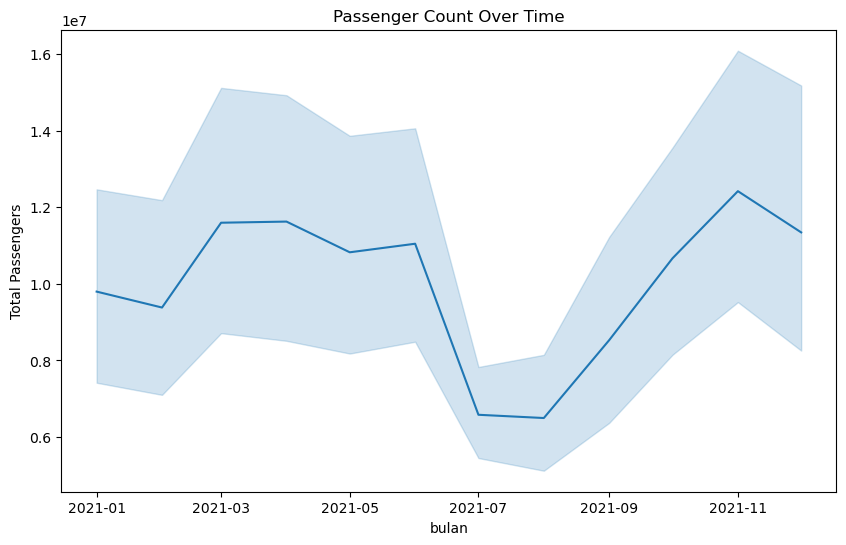

In [214]:
# Replace '1900-12-01' and '1900-01-01' with appropriate year-month combination
dfClean['bulan'] = dfClean['tahun_bulan']

# Convert 'bulan' to datetime type
dfClean['bulan'] = pd.to_datetime(dfClean['bulan'])

# Descriptive statistics
desc_stats = dfClean['jumlah_penumpang'].describe()

# Temporal trends
plt.figure(figsize=(10,6))
sns.lineplot(x='bulan', y='jumlah_penumpang', data=dfClean, estimator='sum')
plt.title("Passenger Count Over Time")
plt.ylabel("Total Passengers")
plt.show()

# Passenger Count Over Time

Dari grafik diatas, terlihat perkembanganan jumlah penumpang dari semua jenis kendaraan yang ada. Terdapat penurunan yang sangat drastis terjadi di bulan Juli - Agustus 2021 dikarenakan penerapan PPKM karena tingginya kasus kematian akibat Covid-19 pada bulan-bulan tersebut. baru di bulan September 2021 jumlah penumpang mulai terlihat lagi kenaikannya hingga sampai puncaknya pada bulan November 2021.

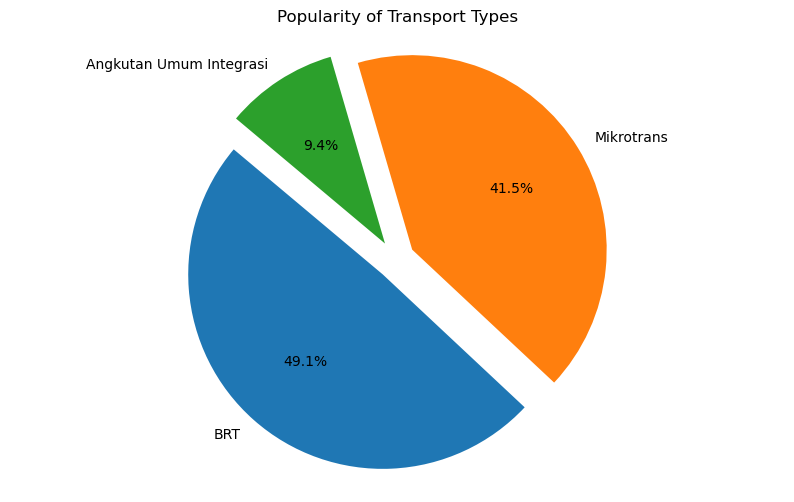

In [215]:
# Popularity of transport types
pop_transports = dfClean.groupby('jenis')['jumlah_penumpang'].sum().sort_values(ascending=False)

# Create explode data
explode = [0.1]*len(pop_transports)

# Plot
plt.figure(figsize=(10,6))
plt.pie(pop_transports.values, labels = pop_transports.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Popularity of Transport Types")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Popularity of Transport Types

Dapat disimpulkan bahwa dari tiga jenis kendaraan yang ada, BRT merupakan kendaraan paling populer, sedangkan Angkutan Umum Integrasi merupakan yang paling tidak populer jika dilihat berdasarkan Total Jumlah Penunmpang.

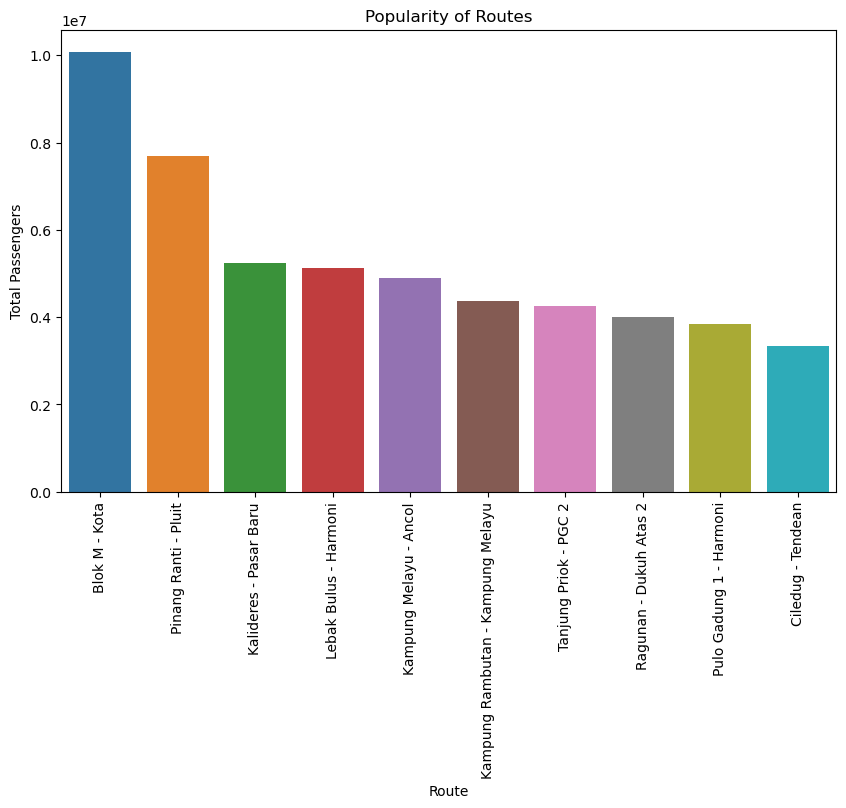

In [216]:
plt.figure(figsize=(10,6))
sns.barplot(x=pop_routes.index[:10], y=pop_routes.values[:10]) # Display top 10 routes only for readability
plt.title("Popularity of Routes")
plt.xlabel("Route")
plt.ylabel("Total Passengers")
plt.xticks(rotation=90)
plt.show()

# Profitability estimation - replace with your own estimates for cost and revenue per passenger
# dfClean['estimated_revenue'] = dfClean['jumlah_penumpang'] * revenue_per_passenger
# dfClean['estimated_profit'] = dfClean['estimated_revenue'] - (dfClean['jumlah_penumpang'] * cost_per_passenger)

# Correlations - one example would be between 'jenis_encoded' and 'jumlah_penumpang'
# correlation = dfClean[['jenis_encoded', 'jumlah_penumpang']].corr()

# Route analysis - for most and least popular routes
most_pop_route = pop_routes.idxmax()
least_pop_route = pop_routes.idxmin()

# Popularity of Routes

Berikut merupakan rute-rute yang menyumbangkan jumlah penumpang terbanyak. terlihat bahwa meskipun dengan jumlah rute yang paling sedikit diantara ketiga jenis kendaraan yang ada, 10 rute dengan jumlah penumpang terbanyak seluruhnya ditempati oleh BRT dengan rute Blok M-Kota sebagai penyumbang jumlah penumpang tertinggi di angka 10Jt penumpang dan rute Ciledug-Tendean yang paling rendah di angka 3,3Jt Penumpang.

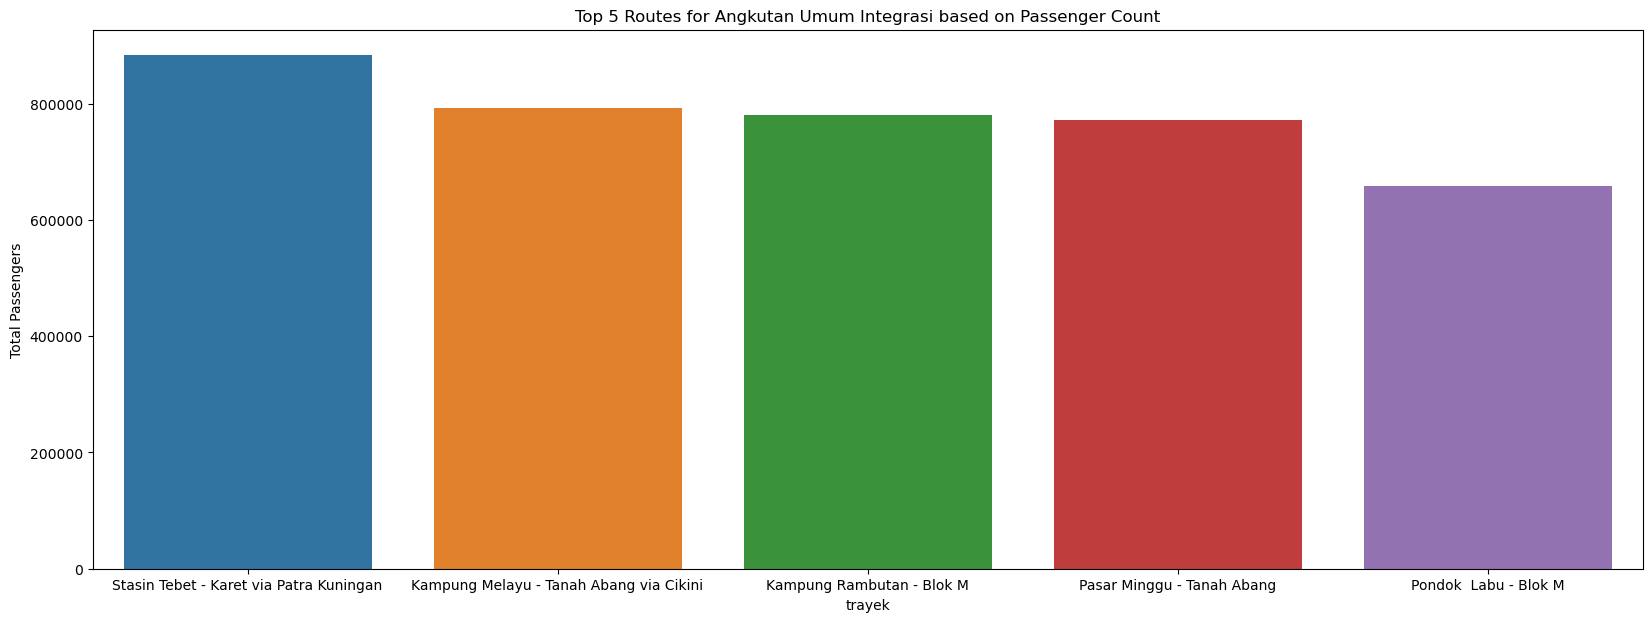

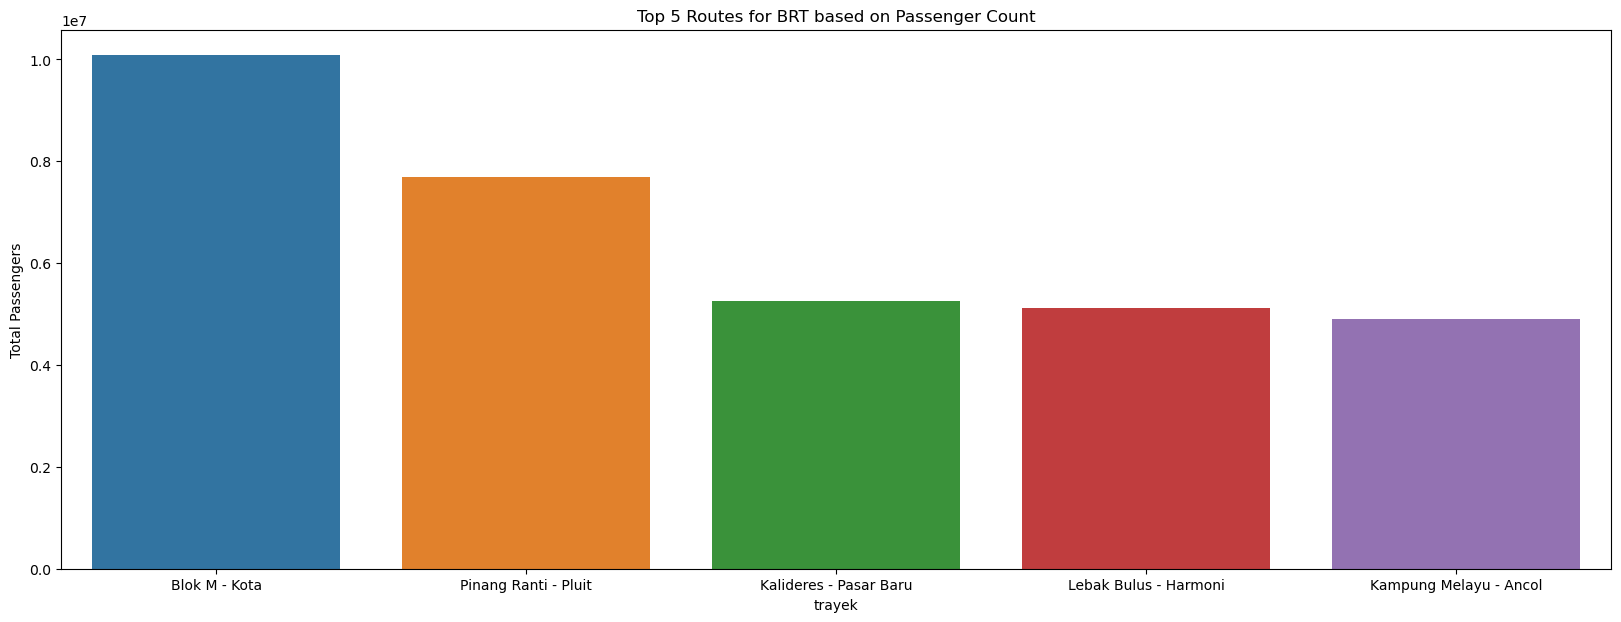

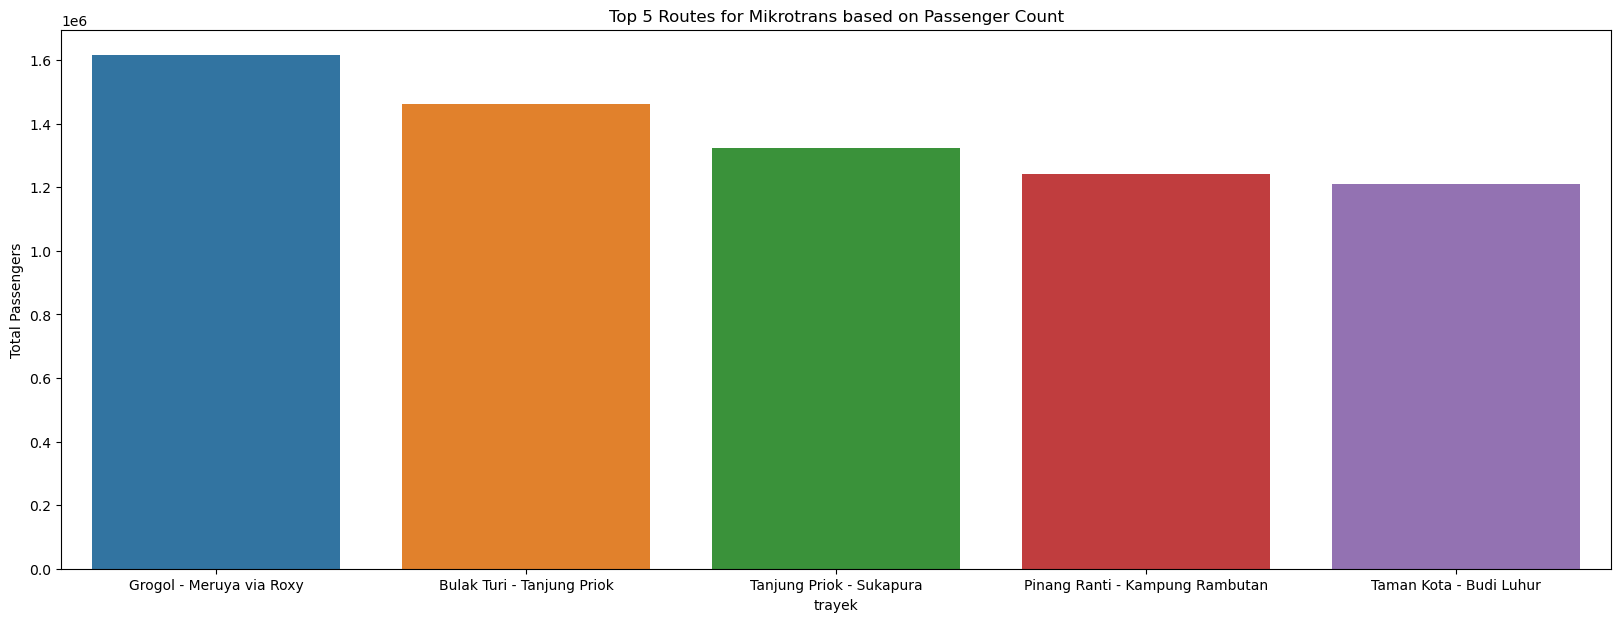

In [217]:
# Group data by 'jenis' and 'trayek', summing 'jumlah_penumpang'
grouped = dfClean.groupby(['jenis', 'trayek'])['jumlah_penumpang'].sum().reset_index()

# Function to get the top 5 routes for each vehicle type
def top_5_routes(vehicle_type):
    return grouped[grouped['jenis'] == vehicle_type].nlargest(5, 'jumlah_penumpang')

# Get unique vehicle types
vehicle_types = dfClean['jenis'].unique()

# Plotting top 5 routes for each vehicle type
for vehicle in vehicle_types:
    top_5 = top_5_routes(vehicle)
    plt.figure(figsize=(20,7))
    sns.barplot(data=top_5, x='trayek', y='jumlah_penumpang')
    plt.title(f'Top 5 Routes for {vehicle} based on Passenger Count')
    plt.ylabel('Total Passengers')
    plt.show()

# Top 5 Routes based on Passenger Counts

**BRT Passenger Counts**
Rute Blok M - Kota merupakan yang paling populer berdasarkan jumlah penumpang di angkat 10Jt dan paling populer ke 5 diisi oleh rute Kampung Melayu - Ancol dengan jumlah penumpang sebanyak 5jt

**Mikrotrans**
Rute Grogol - Meruya via Roxy merupakan rute paling populer bagi pengguna jenis kendaraan *Mikrotrans* dengan jumlah penumpang mencapai 1,6Jt dan rute Taman Kota - Budi Luhur ada di peringkat ke-5 dengan penumpang sebanyak 1,2Jt

**Angkutan Umum Integrasi**
Rute Stasiun Tebet - Karet via Patra Kuningan merupakan yang paling populer dengan penumpang sebanyak 850Rb diikuti oleh rute Kampung Melayu - Tanah Abang via Cikini dan Kampung Rambutan - Blok M dengan masing-masing jumlah penumpang di sekitar 800Rb


# KESIMPULAN

Berdasarkan analisis data penumpang Transjakarta 2021, ada tiga jenis kendaraan utama yang beroperasi: BRT, Mikrotrans, dan Angkutan Umum Integrasi. Meskipun memiliki rute yang relatif sedikit, BRT mencatat jumlah penumpang tertinggi setiap tahun, diikuti oleh Mikrotrans yang populer karena beragam rutenya. Angkutan Umum Integrasi memiliki jumlah penumpang terendah dibanding dua lainnya. Semua jenis kendaraan mengalami penurunan penumpang yang signifikan pada Juli-Agustus 2021 akibat kebijakan PPKM yang diterapkan pemerintah untuk merespons peningkatan kematian akibat Covid-19. Kendati demikian, luar periode tersebut, penumpang tetap tinggi karena kebutuhan pengguna. 

# REKOMENDASI

Investasi pada Transjakarta dapat memberikan ROI yang cukup tinggi, khususnya pada dua jenis kendaraan yaitu BRT dan Angkutan Umum Integrasi. Untuk jenis kendaraan Mikrotrans, investasi tidak menjadi pilihan karena adanya kebijakan subsidi pemerintah yang membuat layanan ini gratis untuk pengguna. BRT menawarkan ROI yang tinggi karena banyaknya pengguna, namun ini membutuhkan investasi awal yang besar. Sementara itu, Angkutan Umum Integrasi, meskipun jumlah penggunanya tidak sebanyak BRT, dapat menawarkan ROI yang lebih tinggi dalam persentase dan memerlukan investasi yang lebih kecil. Oleh karena itu, investor harus mempertimbangkan berbagai faktor termasuk ROI potensial dan investasi awal sebelum membuat keputusan investasi.

In [218]:
# Simpan DataFrame sebagai CSV
dfClean.to_csv('tj2021Clean.csv', index=False)